https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/

## Recommendation System

추천 시스템은 정보 필터링 시스템의 한 유형으로 사용자가 아이템에 부여 할 평가나 선호도를 예측하는데 사용한다.


**basically three types of recommender systems**

- Demographic Filtering : 인구통계학적 특징이 유사한 사용자에게 동일한 영화 추천
- Content Based Filtering : item을 기반으로 유사한 item 추천. 메타데이터 필요(영화 장르, 감동, 설명, 배우)
- Collaborative Filtering : 비슷한 관심사를 가진 사람을 매칭하고 이를 기반으로 추천

## Movie Recommendation System
- dataset : TMDB 5000 Movie Dataset


	- movie_id - A unique identifier for each movie.
	- cast - The name of lead and supporting actors.
	- crew - The name of Director, Editor, Composer, Writer etc.

	- budget - The budget in which the movie was made.
	- genre - The genre of the movie, Action, Comedy ,Thriller etc.
	- homepage - A link to the homepage of the movie.
	- id - This is infact the movie_id as in the first dataset.
	- keywords - The keywords or tags related to the movie.
	- original_language - The language in which the movie was made.
	- original_title - The title of the movie before translation or adaptation.
	- overview - A brief description of the movie.
	- popularity - A numeric quantity specifying the movie popularity.
	- production_companies - The production house of the movie.
	- production_countries - The country in which it was produced.
	- release_date - The date on which it was released.
	- revenue - The worldwide revenue generated by the movie.
	- runtime - The running time of the movie in minutes.
	- status - "Released" or "Rumored".
	- tagline - Movie's tagline.
	- title - Title of the movie.
	- vote_average - average ratings the movie recieved.
	- vote_count - the count of votes recieved.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
df1.columns = ['id', 'tittle', 'cast', 'crew']

In [15]:
df2 = df2.merge(df1, on='id')
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Demographic Filtering

- 영화에 점수를 매기거나 평가를 위해 측정항목이 필요
- 모든 영화의 점수 계산
- 점수를 정렬하고 사용자에게 최고 등급의 영화추천

#### IMDB's weighted rating

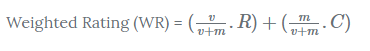

- v : 영화에 대한 투표수
- m : 차트에 나열하는데 필요한 최소 투표수
- R : 영화 평균 등급
- C : 전체 보고서에 대한 평균 투표

In [8]:
# the mean vote across the whole report
C = df2['vote_average'].mean()
C

6.092171559442011

In [9]:
#  the minimum votes required to be listed in the chart
# 영화가 차트에 포함되려면 목록에 있는 영화의 90%이상보다 더 많은 표가 있어야 함

m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [10]:
# filter out the movies that qualify for the chart

q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [11]:
# calculate our metric for each qualified movie

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [13]:
# Sort movies based on score calulated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

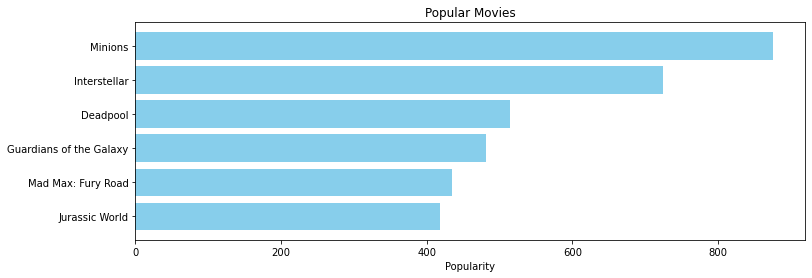

In [14]:
pop= df2.sort_values('popularity', ascending=False)


import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

인구통계학적 추천시스템은 사용자의 관심사와 취향에 민감하지 않고 모든 사용자에게 일반적인 추천을 제공함